### Abstract
We would like to see if there is any connection between the products (names) and price, as well as existing patterns. This is set a-priori. When we do the exploration further question will arise. Some of the data will be removed as it will not be used. There will be plots, groupings and hypothesis testing via ANOVA to find potential connections. In this notebook we will explore the nature of the products, the last one went from the countries to their creator.

In [17]:
%matplotlib inline

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import mstats

# Author
## Stefan Panev

### Introduction
For the second dataset we will choose the wfp_market_food_prices from here: https://www.kaggle.com/jboysen/global-food-prices#wfp_market_food_prices.csv. The file is saved in the data folder.

## Table of Contents:
* [Introduction](#first-bullet)
* [Reading the Data and Preprocessing](#second-bullet)
* [EDA - grouping and plotting](#fourth-bullet)
* [Hypothesis testing via Z test](#fifth-bullet)
* [Conclusion](#sixth-bullet)
* [Further Development](#seventh-bullet)

### Reading the Data and Preprocessing

In [19]:
food_price_data = pd.read_csv('data\wfp_market_food_prices.csv', sep = ',', encoding='iso-8859-1')

The data is read and stored as food_price_data, the separator is a  ','  , there is an UTF8 encoding that has successfully been fixed with iso-8859-1 encoding. We are having 743914 rows and 18 columns at the beginning.

In [20]:
food_price_data.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,1,2014,50.0,WFP
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,2,2014,50.0,WFP
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,3,2014,50.0,WFP
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,4,2014,50.0,WFP
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,5,2014,50.0,WFP


In [21]:
food_price_data.shape

(743914, 18)

In [22]:
food_price_data.columns

Index(['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name',
       'cm_id', 'cm_name', 'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id',
       'um_name', 'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource'],
      dtype='object')

Most of ids tell us little information so they will be removed. We are left with 11 columns.

In [23]:
food_price_data = food_price_data.drop(['adm0_id', 'adm1_id', 'cm_id', 'mkt_id', 'cur_id', 'pt_id', 'um_id'] , axis = 1 )

In [24]:
food_price_data.shape

(743914, 11)

In [25]:
food_price_data.head()

,adm0_name,adm1_name,mkt_name,cm_name,cur_name,pt_name,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,Afghanistan,Badakhshan,Fayzabad,Bread,AFN,Retail,KG,1,2014,50.0,WFP
1,Afghanistan,Badakhshan,Fayzabad,Bread,AFN,Retail,KG,2,2014,50.0,WFP
2,Afghanistan,Badakhshan,Fayzabad,Bread,AFN,Retail,KG,3,2014,50.0,WFP
3,Afghanistan,Badakhshan,Fayzabad,Bread,AFN,Retail,KG,4,2014,50.0,WFP
4,Afghanistan,Badakhshan,Fayzabad,Bread,AFN,Retail,KG,5,2014,50.0,WFP


### EDA - grouping and plotting

In [29]:
products = food_price_data.groupby(['cm_name'], axis=0)['mp_price'].mean()

In [34]:
products

cm_name
Apples                                             106.001701
Apples (red)                                      1425.104470
Avocados                                           209.374762
Bananas                                            210.652722
Bananas (medium size)                                5.596964
Beans                                            35930.450876
Beans (black)                                      364.444558
Beans (butter)                                      71.097794
Beans (catarino)                                    72.322850
Beans (dry)                                        418.211878
Beans (fava, dry)                                   13.133533
Beans (green, fresh)                               467.466260
Beans (haricot)                                      8.607755
Beans (kidney red)                                 434.279540
Beans (kidney white)                                51.792416
Beans (kidney)                                       3.065130


Lets start the EDA by grouping the product names by price. We see that there are 321 products, a lot of the product have several types. Sorting the values by price shows that the livestock (sheep, one-year-old alive female) have the highest price tag significantly higher then the rest. Exploring further we see that mostly meat products, rice and fish occupy the top 20 spots. Some studies show that a significant part of the biosphere biomass is made by livestock animals. This could potentially be an evidence for this study, for further reading read the abstract here:
http://www.pnas.org/content/early/2018/05/15/1711842115

In [38]:
products.sort_values(ascending=False).head(20)

cm_name
Livestock (sheep, one-year-old alive female)      1.786756e+06
Rice (white)                                      9.213260e+05
Livestock (cattle)                                1.762069e+05
Rice (paddy)                                      1.378682e+05
Livestock (sheep, two-year-old male)              6.701173e+04
Meat (beef, first quality)                        6.384423e+04
Meat (buffalo, first quality)                     6.341970e+04
Meat (beef, second quality)                       5.583045e+04
Meat (buffalo, second quality)                    5.490517e+04
Livestock (pig)                                   4.648268e+04
Fish (snake head)                                 4.546479e+04
Meat (pork, first quality)                        3.780716e+04
Beans                                             3.593045e+04
Meat (pork, second quality)                       3.390452e+04
Meat (chicken, broiler)                           3.161585e+04
Chili (green)                                  

In [37]:
products.sort_values(ascending=True).head(20)

cm_name
Eggs (imported)                  1.790909
Maize meal (white, roller)       2.156225
Maize meal (white, breakfast)    2.923677
Onions (dry, local)              2.975524
Beans (kidney)                   3.065130
Bread (common)                   3.149557
Meat (chicken, imported)         3.258333
Potatoes (medium size)           3.337528
Water (drinking)                 3.426732
Tomatoes (greenhouse)            3.667646
Tortilla (maize)                 4.132389
Cassava meal                     4.431776
Potatoes (black)                 4.939310
Cheese (white, boiled)           5.286899
Bananas (medium size)            5.596964
Beetroots                        5.622410
Sorghum (food aid)               5.923578
Wheat flour (high quality)       5.964929
Rice (medium grain)              6.212385
Rice (carolina 2da)              6.356250
Name: mp_price, dtype: float64

Doing the opposite suggest that mostly plant food have the cheapest price, as well as water and eggs. We will try to further aggregate the data, because the product categories are to many. We removed the many of the similar types and created the new variable product2.

In [42]:
product2 = food_price_data.groupby([x.split(' ')[0] for x in food_price_data['cm_name']], axis=0)['mp_price'].mean()

In [49]:
product2.shape

(86,)

In [44]:
product2.sort_values(ascending=False).head(20)

Livestock     72486.875456
Sesame        19660.346536
Wage          15081.809960
Gari          11428.958842
Rice          11138.845516
Meat           9334.460052
Fish           8296.532474
Beans          7441.436568
Charcoal       5465.269476
Cowpeas        5311.199394
Yam            4376.368489
Chili          4210.502747
Garlic         3368.442551
Soybeans       3145.146410
Blackberry     2458.680000
Peas           2282.405504
Broccoli       2280.546667
Coffee         2100.743724
Groundnuts     2081.877997
Fuel           1770.573768
Name: mp_price, dtype: float64

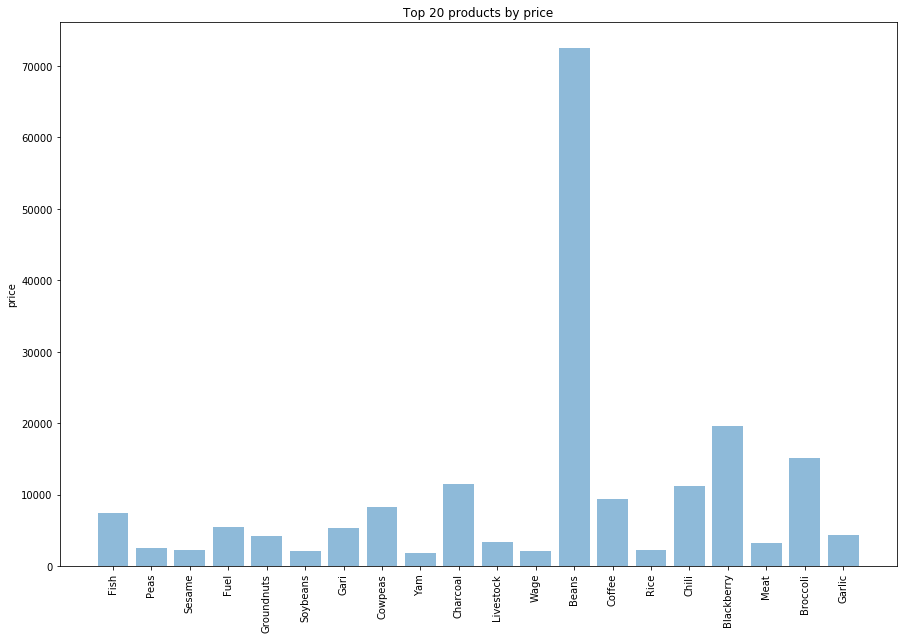

In [63]:
plt.figure(figsize=(15,10))
plt.title("Top 20 products by price")
plt.bar(product2.sort_values(ascending=False).head(20).index, product2.sort_values(ascending=False).head(20).values, align='center', alpha=0.5)
plt.xticks(product2.sort_values(ascending=False).head(20).index, rotation=90)
plt.ylabel('price')
plt.show()

Now we have reduced the number of products to 86. The top 20 confirms our suspicion that the livestock mean price is significantly higher then the rest, after that are various plant species some meat and fish. The visualization is telling us how much higher is the price of the livestock. Interesting the 20th potions is Fuel, it can be suggested that some of the food produced is used as a biofuel, see here https://en.wikipedia.org/wiki/Biofuel. Unfortunately looking at the data there is not something useful for further exploration on the topic. Now lets view the bottom 20.

In [45]:
product2.sort_values(ascending=False).tail(20)

Bananas        205.641361
Beans(mash)    203.113371
Potatoes       171.549511
Poultry        153.028182
Carrots        146.618798
Cabbage        119.939404
Sweet          115.756188
Butter          95.931737
Ghee            88.872130
Curd            66.996478
Parsley         65.931530
Cashew          56.336731
Fat             35.001130
Sour            29.473698
Buckwheat       21.979291
Noodles          9.330782
Labaneh          8.011913
Beetroots        5.622410
Tortilla         4.132389
Water            3.426732
Name: mp_price, dtype: float64

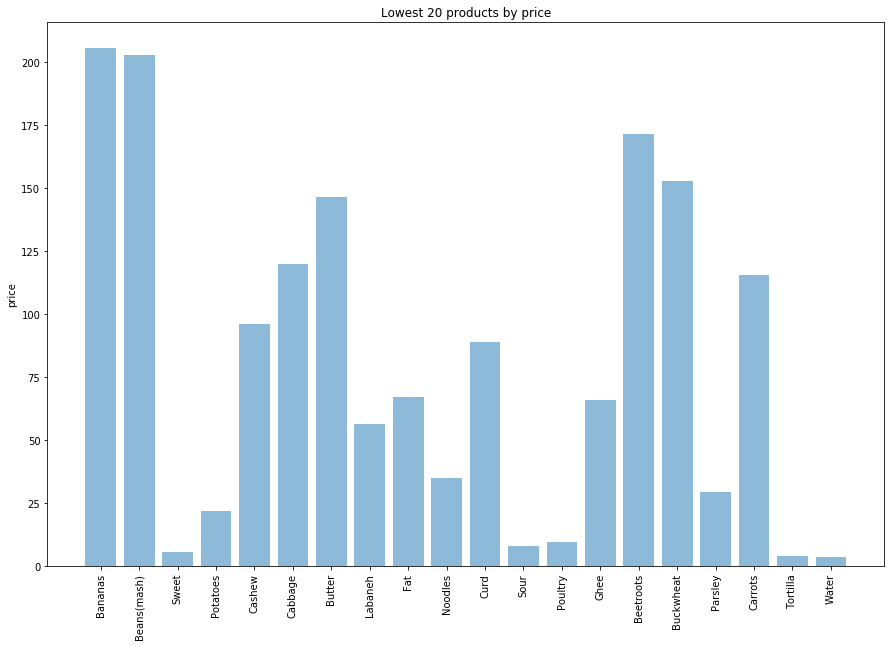

In [64]:
plt.figure(figsize=(15,10))
plt.title("Lowest 20 products by price")
plt.bar(product2.sort_values(ascending=False).tail(20).index, product2.sort_values(ascending=False).tail(20).values, align='center', alpha=0.5)
plt.xticks(product2.sort_values(ascending=False).tail(20).index, rotation=90)
plt.ylabel('price')
plt.show()

The lowest 20 are occupied with mostly plant food. Their mean price is significantly lower then the rest. The variance between the price is lower then in the top 20, but the lowest 6 are significantly lower then the rest.
The lowest is water. It is hard to interpret why the price of water is the lowest, is it only as a by product for the process of creating other food products. Considering many countries are suffering dwindling water supply, the price of water should be higher. See here more on the topic https://www.theguardian.com/global-development-professionals-network/2017/mar/27/aquifers-worlds-reserve-water-tank-asia

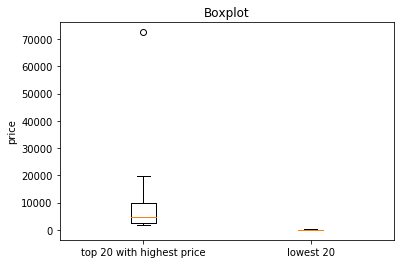

In [66]:
plt.boxplot([product2.sort_values(ascending=False).head(20).values, product2.sort_values(ascending=False).tail(20).values], labels = ["top 20 with highest price", "lowest 20"])
plt.ylabel("price")
plt.title('Boxplot')
plt.show()

The boxplot proves that the variance is higher for the top 20, the live stock is is clearly an outlier. Lets try to remove the outlier, to see if there is a significant change. There is another lower outlierso it is also going to be removed.

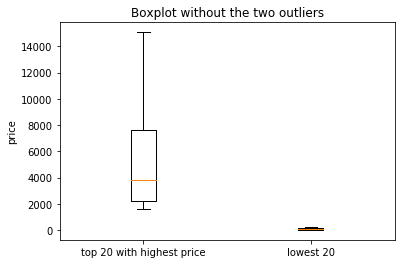

In [78]:
plt.boxplot([product2.sort_values(ascending=False).iloc[2:].head(20).values, product2.sort_values(ascending=False).tail(20).values], labels = ["top 20 with highest price", "lowest 20"])
plt.ylabel("price")
plt.title('Boxplot without the two outliers')
plt.show()

Even without the outliers there is still a large difference, now lets try to plot the lowest 20 separately because it is not very evident in this boxplot, the scale for the top 20 if far higher.

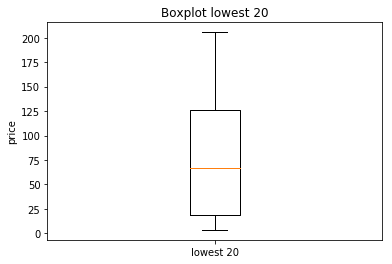

In [79]:
plt.boxplot([product2.sort_values(ascending=False).tail(20).values], labels = ["lowest 20"])
plt.ylabel("price")
plt.title('Boxplot lowest 20')
plt.show()

With the latest boxplot we can conclude that the lowest 20 products have a much more symmetric distribution compared with the top 20, who seem to be skewed to the right. Now a histogram will make things more clearly.

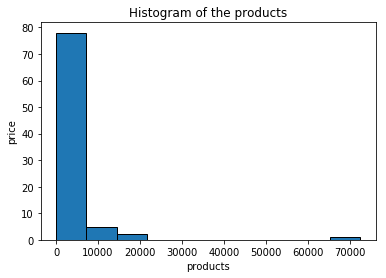

In [81]:
plt.hist(product2, edgecolor = 'black')
plt.xlabel("products")
plt.ylabel("price")
plt.title('Histogram of the products')
plt.show()

In [107]:
product2.skew()

7.2542362732803678

The distribution is very skewed to the left. We will try to remove the outliers and increase the number of bins for a clear picture.

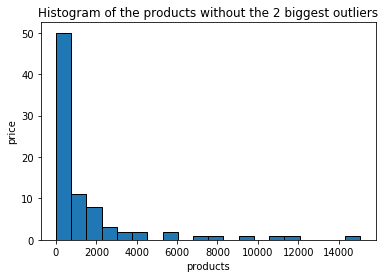

In [84]:
plt.hist(product2.sort_values(ascending=False).iloc[2:], edgecolor = 'black', bins = 20)
plt.xlabel("products")
plt.ylabel("price")
plt.title('Histogram of the products without the 2 biggest outliers')
plt.show()

In [106]:
product2.sort_values(ascending=False).iloc[2:].skew()

2.9428586892652127

Still the majority are cheaper then the rest, the more expensive products don't have a very high number. We will try to remove the top 15 products to see if the distribution will become smoother. Still the majority are concentrated in the lower part.

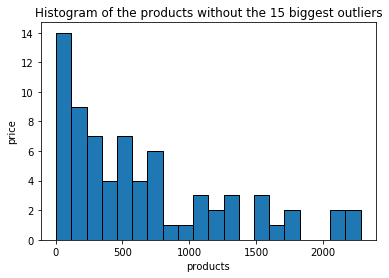

In [85]:
plt.hist(product2.sort_values(ascending=False).iloc[15:], edgecolor = 'black', bins = 20)
plt.xlabel("products")
plt.ylabel("price")
plt.title('Histogram of the products without the 15 biggest outliers')
plt.show()

In [105]:
product2.sort_values(ascending=False).iloc[15:].skew()

1.0773168907536925

In [86]:
product2.index

Index(['Apples', 'Avocados', 'Bananas', 'Beans', 'Beans(mash)', 'Beetroots',
       'Blackberry', 'Bread', 'Broccoli', 'Buckwheat', 'Bulgur', 'Butter',
       'Cabbage', 'Carrots', 'Cashew', 'Cassava', 'Cauliflower', 'Charcoal',
       'Cheese', 'Chickpeas', 'Chili', 'Cocoa', 'Coffee', 'Cornstarch',
       'Cotton', 'Cowpeas', 'Cucumbers', 'Curd', 'Dates', 'Eggplants', 'Eggs',
       'Exchange', 'Fat', 'Fish', 'Fonio', 'Fuel', 'Gari', 'Garlic', 'Ghee',
       'Groundnuts', 'Guava', 'Labaneh', 'Lentils', 'Lettuce', 'Livestock',
       'Maize', 'Mangoes', 'Meat', 'Milk', 'Millet', 'Noodles', 'Oil',
       'Onions', 'Oranges', 'Papaya', 'Parsley', 'Passion', 'Pasta', 'Peanut',
       'Peas', 'Peppers', 'Plantains', 'Potatoes', 'Poultry', 'Pulses',
       'Pumpkin', 'Rice', 'Salt', 'Sesame', 'Sorghum', 'Sour', 'Soybeans',
       'Spinach', 'Sugar', 'Sweet', 'Tamarillos/tree', 'Tea', 'Tomatoes',
       'Tortilla', 'Transport', 'Wage', 'Water', 'Wheat', 'Yam', 'Yogurt',
       'Zucchini'],
 

Now let us consider that the product are divided into 2 groups, animal-derived products and plant derived products. When we gen the product2 index we see that some of the products are not a part of the 2 categories like water, salt, there is also other costs, that we have not come across earlier like Transport, Wage, Charcoal, Exchange or Fuel (it can be speculated if the fuel is plant derived or traditional fossil fuels, lets assume its plant derived and we will leave it hear), there is also oil (let as assume its plant oil and it will stay). We will omit the 'wage' and the 'transport', 'charcoal', 'exchange' from now own. It would be wise to do the same exploration as the above but without this 'additions'.

In [97]:
product2[['Wage', 'Transport','Charcoal','Exchange' ]]

Wage         15081.809960
Transport      681.439704
Charcoal      5465.269476
Exchange       538.113119
Name: mp_price, dtype: float64

If we get the wage and the transport, charcoal, exchange separately we see that they are not outliers, none make it to the top 20.

In [92]:
product2.describe()

count       86.000000
mean      2671.669273
std       8331.367310
min          3.426732
25%        216.734536
50%        636.871839
75%       1614.026810
max      72486.875456
Name: mp_price, dtype: float64

Now we get the descriptive statistics, both wage and transport are below the mean, what if we remove the 15 biggest?
The mean drops mean and standard deviation drop significantly. We don't think that the wage and the transport, charcoal, exchange are going to have a very big impact, considering the time, we will leave their removal for the above research for another time. But now they will be removed from now own. Livestock is also removed as being the largest outlier.

In [94]:
product2.sort_values(ascending=False).iloc[15:].describe()

count      71.000000
mean      655.756099
std       617.595760
min         3.426732
25%       187.331441
50%       489.675007
75%      1022.681356
max      2282.405504
Name: mp_price, dtype: float64

In [98]:
product2.drop(['Wage', 'Transport','Charcoal' ,'Exchange']).sort_values(ascending=False).iloc[15:].describe()

count      67.000000
mean      608.599672
std       567.427670
min         3.426732
25%       162.288846
50%       458.264684
75%       903.947403
max      2100.743724
Name: mp_price, dtype: float64

In [100]:
plant_derived = product2[['Apples', 'Avocados', 'Bananas', 'Beans', 'Beans(mash)', 'Beetroots',
       'Blackberry', 'Bread', 'Broccoli', 'Buckwheat','Bulgur','Cabbage', 'Carrots', 'Cashew', 'Cassava', 'Cauliflower',
       'Chili', 'Cocoa', 'Coffee', 'Cornstarch','Cotton','Cowpeas', 'Cucumbers','Dates', 'Eggplants','Fonio', 'Gari',
        'Garlic','Guava','Lentils','Lettuce','Maize', 'Mangoes','Millet', 'Noodles', 'Oil','Onions', 'Oranges', 'Papaya',
        'Parsley', 'Passion', 'Pasta', 'Peanut','Peas', 'Peppers', 'Plantains', 'Potatoes', 'Poultry', 'Pulses',
        'Pumpkin', 'Rice','Sesame', 'Sorghum', 'Sour', 'Soybeans',
       'Spinach', 'Sugar', 'Sweet', 'Tamarillos/tree', 'Tea', 'Tomatoes','Tortilla', 'Wheat', 'Yam', 'Yogurt',
       'Zucchini']]

In [101]:
animal_derived = product2[['Butter','Cheese','Eggs','Curd','Fat', 'Fish','Labaneh','Meat', 'Milk']]

In [103]:
plant_derived.count()

66

In [104]:
animal_derived.count()

9

### Hypothesis Testing
The number of animal derived products is far lower then the rest.

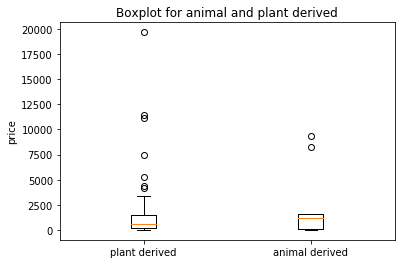

In [111]:
plt.boxplot([plant_derived.values, animal_derived.values], labels = ["plant derived", "animal derived"])
plt.ylabel("price")
plt.title('Boxplot for animal and plant derived')
plt.show()

In [112]:
plant_derived.skew()

3.9032296714241212

In [113]:
animal_derived.skew()

1.523287907300602

In [116]:
plant_derived.idxmax()

'Sesame'

The Boxplot shows that the plant derived products are more skewed to the right. We will try to remove the biggest outlier in the plants derived in our case 'Sesame'.

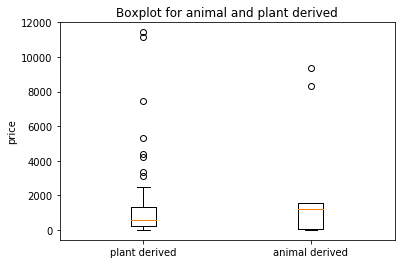

In [117]:
plt.boxplot([plant_derived.sort_values(ascending=False).iloc[1:].values, animal_derived.values], labels = ["plant derived", "animal derived"])
plt.ylabel("price")
plt.title('Boxplot for animal and plant derived')
plt.show()

We will try a one way parametric ANOVA test from the stats package, to see if there is any statistical significant differences between the mean of the 2 groups, for more information of the test see here: https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/. We set the H0 hypothesis that there is no statistically significant difference between the 2 means, and the H1 that there is. We take the default value for the p-value of 0.05, if the it is higher we reject the H1 hypothesis else, we reject the H0 hypothesis.

In [119]:
F, p = stats.f_oneway(plant_derived.sort_values(ascending=False).iloc[1:].values, animal_derived.values)

In [120]:
F, p

(1.523497920564596, 0.22110442241658015)

The p-value is higher the 0.05 so, we will conclude that H0 is the correct hypothesis. This is good, but if we read the criteria for for one way ANOVA we can see that the two populations are not normally distributed and it is possible that they are dependent or and populations are not the same see here:
https://en.wikipedia.org/wiki/Homogeneity_and_heterogeneity 
This leaves us that the results are not to be trusted.

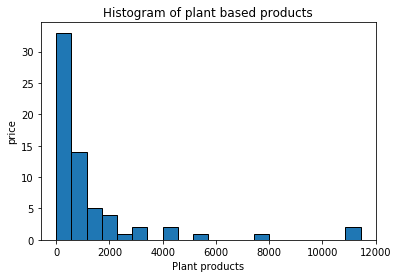

In [122]:
plt.hist(plant_derived.sort_values(ascending=False).iloc[1:], edgecolor = 'black', bins = 20)
plt.xlabel("Plant products")
plt.ylabel("price")
plt.title('Histogram of plant based products')
plt.show()

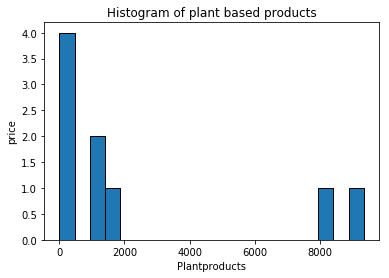

In [123]:
plt.hist(animal_derived, edgecolor = 'black', bins = 20)
plt.xlabel("Plantproducts")
plt.ylabel("price")
plt.title('Histogram of plant based products')
plt.show()

Now we will use another non-parametric test Kruskal-Wallis H-test.For more information for the test check here: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.mstats.kruskalwallis.html The hypothesis are the same. Now we don't assume normal distributions and similar sizes to the population.

In [126]:
H, p_value = mstats.kruskalwallis(plant_derived.sort_values(ascending=False).iloc[1:].values, animal_derived.values)

In [128]:
H, p_value

(6.837606838416832e-05, 0.99340238187075891)

The p-value is significantly higher then 0.05 meaning we reject the H1 hypothesis, and conclude that the mean price of the plant and animal derived product are statistically similar.

In [129]:
animal_derived.mean()

2435.139785765948

In [131]:
plant_derived.mean()

1637.1796028978513

Unfortunately this test is also not the best, is assumes that the populations are independent. Some of the plant derived food can be used for food for animals. There could also be competition for land for example so there is likely some form of interdependence between the populations. The issue should be addressed for example with https://en.wikipedia.org/wiki/Multivariate_analysis_of_variance. But for now we conclude the work on this notebook.

### Conclusion
The focus of this notebook was on the the products and their prices, several grouping and preprocessing have been used. Finally the products were divided to plant and animal based. Some of the products were excluded, also several links have been added, if the reader is more interested on the subject. Finally an one way ANOVA test and the non-parametric test Kruskal-Wallis H-test were used. The results were inconclusive.

### Further development
In the future the time and the countries, sectors could also be checked. Some counties are exporters, others are importers, there could be seasonality based on the time of year.
<br>
Also there is a clear connection between the variables, this should also be addressed.